In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Required Liberaries

In [2]:
# Libraries for Maths and Analysis
import pandas as pd
import numpy as np

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing Warnings
import warnings
warnings.filterwarnings("ignore")

# importing sklearn liberaries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

# Read the Data

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Understanding

**Survived :**        1 means Survived   ,  0 means Not Survived.

**Pclass   :**        1 means upper class , 2 means middle class , 3 means lower class.

**Name  , Sex  an Age :** they are self explantory.

**SibSp    :**  is the total number of passengers siblings and spouse.

**Parch    :** is the total number of passengers , parents and childrens.

**Ticket, Fare, Cabin :** they are self explantory.

**Embarked :** is port of embarktion , from which location the passenger boarded the ship.

# Data Inspection

In [6]:
# Concat both the dataset and analyse together after fixing the data we will seperate that again

df_train = pd.concat([df_train, df_test], axis=0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Check for the Data shapes

print("Train Data Shape: ", df_train.shape)

Train Data Shape:  (1309, 12)


In [8]:
# Check for the Data Columns

print("Train Data Column Names: ", df_train.columns)

Train Data Column Names:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Check for the Duplicate rows

print("Total Duplicate rows in Train data: ", df_train.duplicated().sum())

Total Duplicate rows in Train data:  0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Handling Missing Values

## Age
**As per the above observation we can see that there are some missing values in age column and as per the describe function we can do some statistical analysis**

**Count :** we have Age Data Available for 714 Passengers.

**mean  :** The Average Age of Passenger is 29 Years.

**std   :** Most Passengers Fall in the Age Range of (mean-std)Age and (mean+std) age i.e (29-14)years to (29+14) years i.e 15 years to 43 Years.

**min :** The Youngest Passenger on Ship is 0.4 Years old that mean s there is a baby(infant) on ship.

**25%(Quantile 1) :** 25% of Passengers  are of Age 20 or younger.

**50%(Quantile 2) :** 50% is also called Median , it means 50% of passengers are younger then 28Yrs Age. which also means remaining 50% Pasengers age is greater then 28 years

**75(Quantile 3)  :** 75% of the Passengesr are younger then 38 Years.

**Max             :** The Oldest Person on Ship is 80 Years old.

### Before jumping to fix the Age column lets just check for the missing values in all the columns

In [12]:
# Lets check the total number of missing values in columns

df_train.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

In [13]:
# lets check the percentage wise missing value for better understanding

(100*df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

In [14]:
# For test data

(100*df_test.isnull().sum()/df_test.shape[0]).sort_values(ascending=False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

**Observation**
* <font color = green>As per the above observation we can see there are missing information in Age, Cabin, Embarked columns.
* <font color = green>But in the Cabin column there is a lot of missing values which is difficult to fill, but before removing lets just analyze the Cabin column.
* <font color = green>But we can fix Age and Embarked column by filling suitable values.

### Analyze Cabin Column

In [15]:
# We know there are so many missing values in the cabin column lets just give two values to the cabin.
# WithCabin people have the cabin and WithoutCabin for NA values
df_train.Cabin = df_train.Cabin.apply(lambda x: 'WithoutCabin' if pd.isnull(x) else 'WithCabin' )
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,WithoutCabin,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,WithCabin,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,WithoutCabin,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,WithCabin,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,WithoutCabin,S


Total Passengers With or Without Cabin

 Cabin
WithCabin        295
WithoutCabin    1014
Name: count, dtype: int64


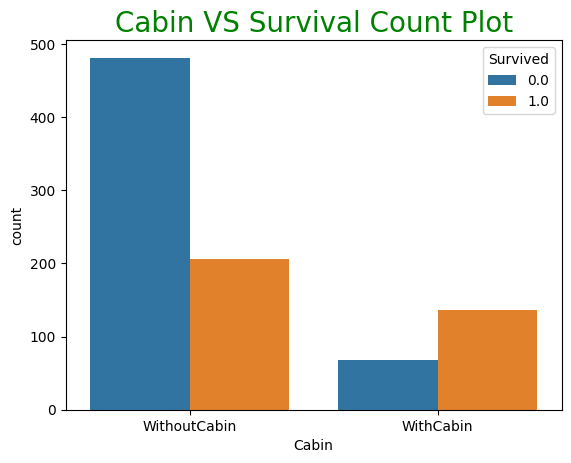


Count of Passenger survived and died


Survived,0.0,1.0,Survival_%
Cabin,,,
WithCabin,68,136,66.666667
WithoutCabin,481,206,29.985444


In [16]:
# Show total count
print("Total Passengers With or Without Cabin\n\n", df_train.Cabin.value_counts(ascending=True))

# Plot the Survival plot wrt Cabin
sns.countplot(data=df_train, x='Cabin', hue='Survived')
plt.title("Cabin VS Survival Count Plot", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

# Show how many survived and died wrt cabin
print("\nCount of Passenger survived and died")
grouped_data = df_train.groupby(['Cabin', 'Survived']).size().unstack(fill_value=0)
grouped_data['Survival_%'] = grouped_data[1]/grouped_data.sum(axis=1)*100
grouped_data

**Observation**
* <font color=Green>As per the above observation we can conclude that people without cabin has higher chances to die, but people with cabin assigned has lower chance to die.
* <font color=Green>So, for now we are going to keep the Cabin column for the further analysis

### Analyze Age Column
**Basic Approach to fill the age column is to fill the mean value in Null rows. But we are going to take different approach to fill these values because it is possible that there will be missing age for the Kids, Unmarried Men/Women, Married Men/Women. So, filling the same mean value for all the categories is not a wise step. So, we are going to use Formal Titles used in the name columns to assign the age to the missing age rows.**

In [17]:
# Make a new column with Title

import re
df_train['Title'] = df_train.Name.apply(lambda x: re.split(r'[,.]', x)[1])
df_train['Title'].str.strip() # Remove any extra spaces
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,WithoutCabin,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,WithCabin,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,WithoutCabin,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,WithCabin,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,WithoutCabin,S,Mr


In [18]:
# Lets take the look on Title column

df_train.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

### Lets take a look at the Titles we have and try to understand it

* **Mr:** Used for adult men.
* **Mrs:** Used for married women.
* **Miss:** Used for unmarried women.
* **Master:** Used for young boys.
* **Don:** A Spanish title, similar to "Sir."
* **Rev (Reverend):** A title for ministers or clergy members.
* **Dr (Doctor):** Used for medical professionals.
* **Mme (Madame):** French title used for married women.
* **Ms:** A neutral title for women, regardless of marital status.
* **Major:** A military rank.
* **Lady:** A title for a woman of high social standing.
* **Sir:** A title of honor for men, similar to "Mr."
* **Mlle (Mademoiselle):** French title used for unmarried women.
* **Col (Colonel):** A military rank.
* **Capt (Captain):** Typically used for military or naval officers.
* **the Countess:** A title for a female count (noble rank).
* **Jonkheer:** A Dutch honorific for a young lord or squire.

1. **Master:** Typically used for young boys less than 18 years old.
2. **Miss:** Generally used for unmarried girls or young women.
3. **Mr/Mrs/Ms:** Used for adults, and the age range can be broad.
4. **Rev/Dr/Capt/Col/Major:** Can be adults and may have a wider age range.

In [19]:
# Lets take a look at the missing age value as per the Title

df_train[df_train['Age'].isnull()].groupby('Title').size()

Title
 Dr          1
 Master      8
 Miss       50
 Mr        176
 Mrs        27
 Ms          1
dtype: int64

In [20]:
# Lets check for the mean value for all the unique Titles

title_mean_age = df_train.groupby('Title')['Age'].mean()
title_mean_age

Title
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [21]:
# Lets assign the age to the null rows in age column as per the mean age we find according to Title.

df_train.Age = df_train.apply(lambda row: title_mean_age[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [22]:
df_train.Age.isnull().sum()

0

count    1309.000000
mean       29.896894
std        13.193803
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age'>

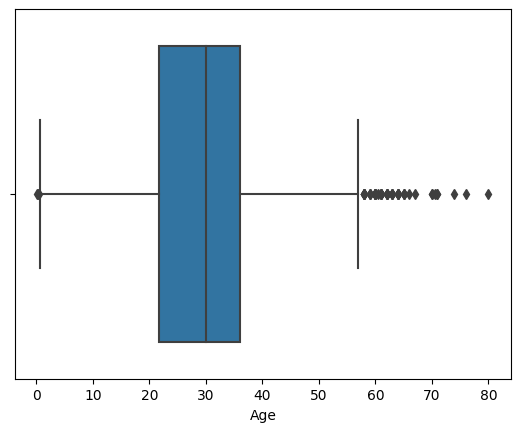

In [23]:
# Now lets just take a look at the spread of the age
print(df_train.Age.describe())
sns.boxplot(x='Age', data=df_train)

### Now we just need to fill values in Embarked Column
* We have three data in the Embarked Column 
* C = Cherbourg, Q = Queenstown, S = Southampton

Count of Embarked Column:
 Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


<Axes: xlabel='Embarked'>

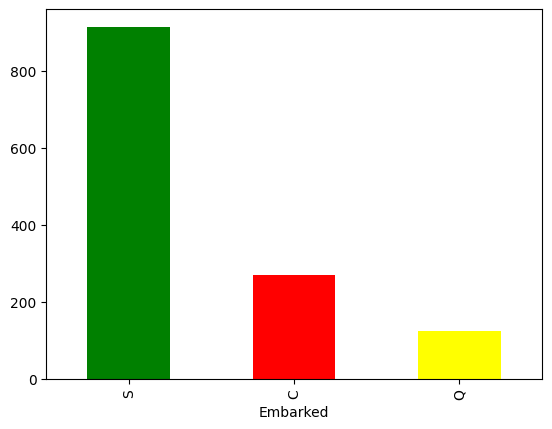

In [24]:
# Lets check for the distribution of these columns

print('Count of Embarked Column:\n', df_train.Embarked.value_counts())
df_train.Embarked.value_counts().plot.bar(color=['Green', 'Red', 'Yellow'])

In [25]:
# At Place of null value just put 'S' as a boarding station

df_train.Embarked.fillna(df_train.Embarked.mode()[0], inplace=True)

In [26]:
# As we had fixed all the null values.
# Lets crossverify the null value

df_train.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
dtype: int64

# Feature Engineering using Data Visualization
* Now we are going to analyze all the features and their spread and theri relation wrt survival and lets see what feature is required for our training data.

In [27]:
# Check for the columns

df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

#### PassengerID Column

In [28]:
# PassengerId is a unique id for all the passengers in our model training this data is not required
# So we have to remove this column from our dataset

df_train.drop('PassengerId', axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,WithoutCabin,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,WithCabin,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,WithoutCabin,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,WithCabin,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,WithoutCabin,S,Mr


#### Pclass Column

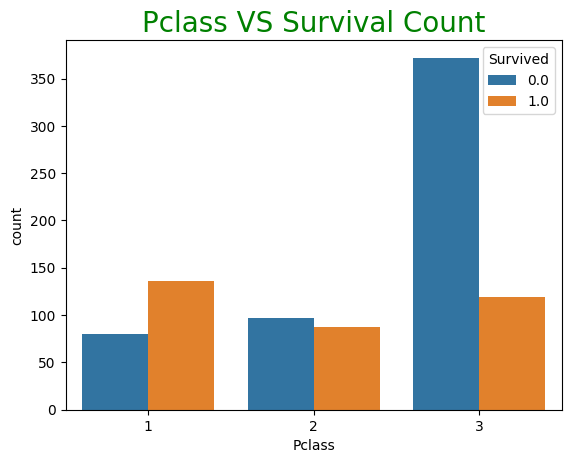


Pclass VS Survival Matrix:



Survived,0.0,1.0,Survival_%
Pclass,,,
1,80,136,62.962963
2,97,87,47.282609
3,372,119,24.236253


In [29]:
# Check for the relation between Pclass and Survived.

sns.countplot(data=df_train, x='Pclass', hue='Survived')
plt.title("Pclass VS Survival Count", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()
print("\nPclass VS Survival Matrix:\n")
pclass_survival = df_train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
pclass_survival['Survival_%'] = pclass_survival[1]/pclass_survival.sum(axis=1)*100
pclass_survival

**Observation**
* <font color=Green>As per the above observation in between Pclass and Survival we can see that Survival rate of passenger traveling in class 1 hase more than class 2 and 3. So, Pclass is crucial for the model training

#### Name Column

In [30]:
# Name column is also a unique identifier for the passenger so we can remove this from our dataset

df_train.drop('Name', axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,WithoutCabin,S,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,WithCabin,C,Mrs
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,WithoutCabin,S,Miss
3,1.0,1,female,35.0,1,0,113803,53.1000,WithCabin,S,Mrs
4,0.0,3,male,35.0,0,0,373450,8.0500,WithoutCabin,S,Mr


#### Sex Column

Total count of male and female:
 Sex
male      843
female    466
Name: count, dtype: int64


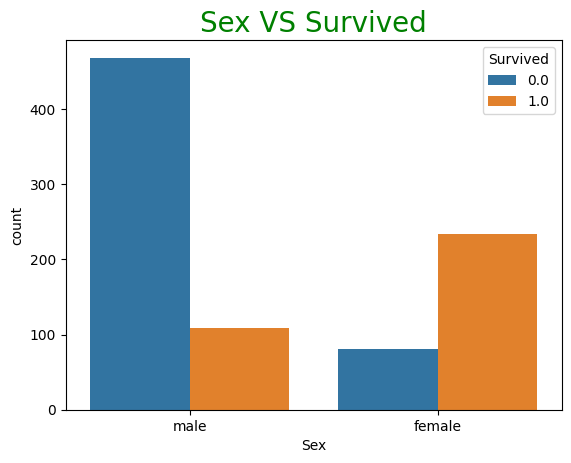


Sex VS Survived Matrix:



Survived,0.0,1.0,Survival_%
Sex,,,
female,81,233,74.203822
male,468,109,18.890815


In [31]:
# Sex column vs Survived

print("Total count of male and female:\n", df_train.Sex.value_counts())

sns.countplot(data=df_train, x='Sex', hue='Survived')
plt.title("Sex VS Survived", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

print("\nSex VS Survived Matrix:\n")
sex_survival = df_train.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
sex_survival['Survival_%'] = sex_survival[1]/sex_survival.sum(axis=1)*100
sex_survival

**Observation**
* <font color=Green>As per the Sex and Survival we can easily say that chance of women to survive is more than man.

#### Age Column

count    1309.000000
mean       29.896894
std        13.193803
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age'>

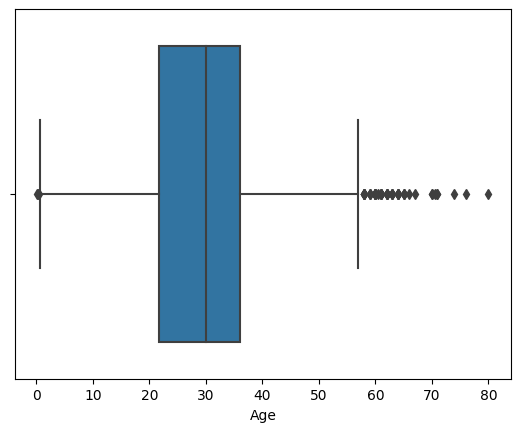

In [32]:
# To analyze the Age Vs Survival first we need to group the age in certain ranges.
# First see the spread of the age again.

print(df_train.Age.describe())
sns.boxplot(x=df_train.Age)

In [33]:
# lets make a new column name Age_Range
# divide our range into 8 seperate groups ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df_train['Age_Range'] = pd.cut(df_train.Age, bins=8, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,WithoutCabin,S,Mr,20-30
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,WithCabin,C,Mrs,30-40
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,WithoutCabin,S,Miss,20-30
3,1.0,1,female,35.0,1,0,113803,53.1000,WithCabin,S,Mrs,30-40
4,0.0,3,male,35.0,0,0,373450,8.0500,WithoutCabin,S,Mr,30-40


Total no of passenger in all age range:
 Age_Range
30-40    413
20-30    412
10-20    162
40-50    133
0-10      94
50-60     62
60-70     27
70-80      6
Name: count, dtype: int64


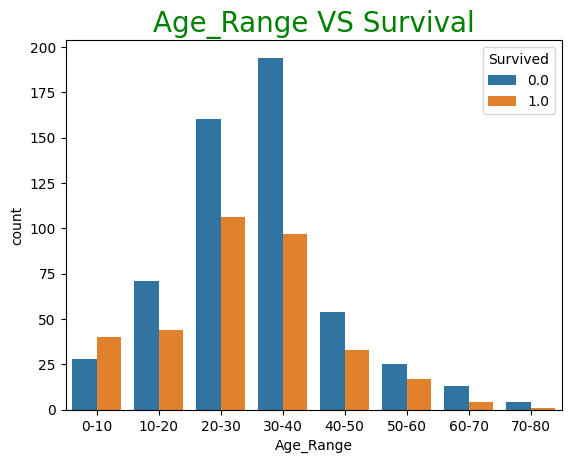


Age_Range vs Survival Matrix:



Survived,0.0,1.0,Survival_%
Age_Range,,,
0-10,28,40,58.823529
10-20,71,44,38.260870
20-30,160,106,39.849624
30-40,194,97,33.333333
40-50,54,33,37.931034
50-60,25,17,40.476190
60-70,13,4,23.529412
70-80,4,1,20.000000


In [34]:
# lets take a look at the no. of passenger in all age ranges
print("Total no of passenger in all age range:\n", df_train.Age_Range.value_counts())

# Plot Age_Range vs Survival plot
sns.countplot(data=df_train, x='Age_Range', hue='Survived')
plt.title("Age_Range VS Survival", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

# Age_Range vs Survival Matrix
print("\nAge_Range vs Survival Matrix:\n")
Age_Range_Survival = df_train.groupby(['Age_Range', 'Survived']).size().unstack(fill_value=0)
Age_Range_Survival['Survival_%'] = 100*Age_Range_Survival[1]/Age_Range_Survival.sum(axis=1)
Age_Range_Survival

**Observation**
* <font color=Green>As per the above Observation we can notice that the survival rate of the kids are High 0-10.
* <font color=Green>We can also see that Survival rate from 10-30 and 40-60 is approx same.
* <font color=Green>And there is very less survival rate for old peoples 60-80.

### We need to look for the dip in the survival percentage of 30-40 age range and 60- 80 age range. Maybe just being old is not the reason.

<Axes: xlabel='Age_Range', ylabel='count'>

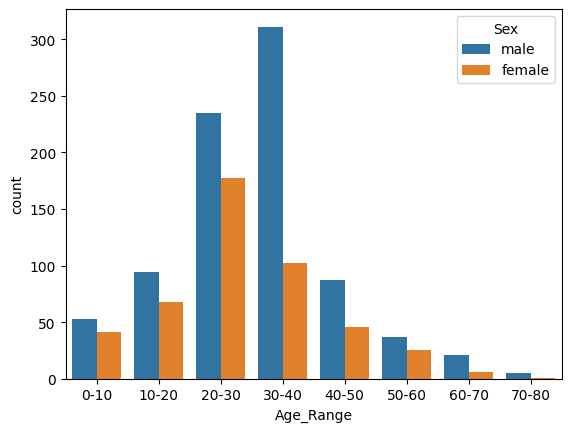

In [35]:
# Plot the count plot for Age_Range and Sex

sns.countplot(data=df_train, x='Age_Range', hue='Sex')

In [36]:
print("\033[1mNo.of people died in Range-(60-80):\033[0m")
print(df_train[((df_train.Age_Range=='60-70') | (df_train.Age_Range=='70-80')) & (df_train.Survived==0)].Sex.value_counts())

print("\n\033[1mNo.of people Survived in Range-(60-80):\033[0m")
df_train[((df_train.Age_Range=='60-70') | (df_train.Age_Range=='70-80')) & (df_train.Survived==1)].Sex.value_counts()

No.of people died in Range-(60-80):
Sex
male    17
Name: count, dtype: int64

No.of people Survived in Range-(60-80):


Sex
female    3
male      2
Name: count, dtype: int64

In [37]:
print("\033[1mNo.of people died in Range-(30-40):\033[0m")
print(df_train[(df_train.Age_Range=='30-40') & (df_train.Survived==0)].Sex.value_counts())

print("\n\033[1mNo.of people Survived in Range-(30-40):\033[0m")
print(df_train[(df_train.Age_Range=='30-40') & (df_train.Survived==1)].Sex.value_counts())

No.of people died in Range-(30-40):
Sex
male      182
female     12
Name: count, dtype: int64

No.of people Survived in Range-(30-40):
Sex
female    60
male      37
Name: count, dtype: int64


**Observation**
1. <font color=Green>In range 60-80 only men have died all females were saved.
2. <font color=Green>The difference we observed in the range 30-40 was because there are more number of males present in that range and the death of male is quite high.

#### SibSp and ParCh columns

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


<Axes: xlabel='SibSp'>

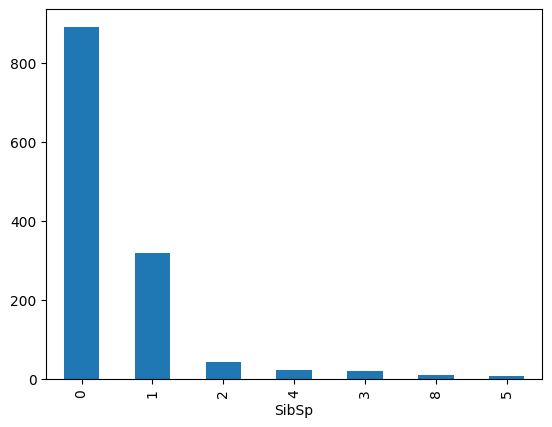

In [38]:
# lets chek for the count of people who are traveling with Sibling and spouse

print(df_train.SibSp.value_counts())
df_train.SibSp.value_counts().plot.bar()

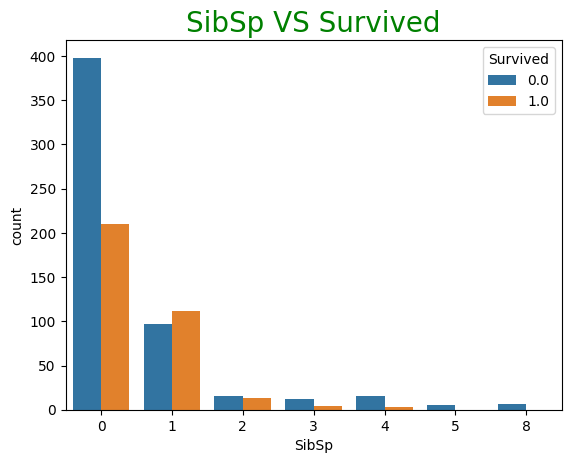

Survived,0.0,1.0,Survival_%
SibSp,,,
0,398,210,34.539474
1,97,112,53.588517
2,15,13,46.428571
3,12,4,25.000000
4,15,3,16.666667
5,5,0,0.000000
8,7,0,0.000000


In [39]:
# Lets check for the relation between survived and sibsp
# To check which kind of traveller has more chance of survival
sns.countplot(data=df_train, x='SibSp', hue='Survived')
plt.title("SibSp VS Survived", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()
# Create a matrix
sibsp_survival = df_train.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
sibsp_survival['Survival_%'] = sibsp_survival[1]/sibsp_survival.sum(axis=1)*100
sibsp_survival

**Observation**
* <font color=Green>Passengers Travelling with more than 4 SibSp have no chance to survive whereas passenger with 1 SibSp has the higher chance to survive.

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


<Axes: xlabel='Parch'>

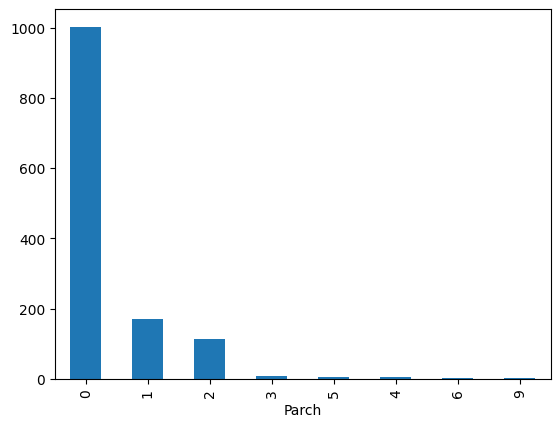

In [40]:
# Letch do the same analysis on ParCh

print(df_train.Parch.value_counts())
df_train.Parch.value_counts().plot.bar()

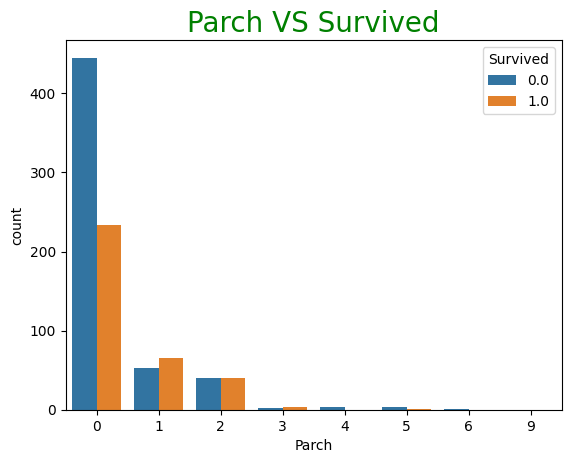

Survived,0.0,1.0,Survival_%
Parch,,,
0,445,233,34.365782
1,53,65,55.084746
2,40,40,50.000000
3,2,3,60.000000
4,4,0,0.000000
5,4,1,20.000000
6,1,0,0.000000


In [41]:
# Lets check for the relation between survived and Parch
# To check which kind of traveller has more chance of survival
sns.countplot(data=df_train, x='Parch', hue='Survived')
plt.title("Parch VS Survived", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

# Create a matrix
parch_survival = df_train.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
parch_survival['Survival_%'] = parch_survival[1]/parch_survival.sum(axis=1)*100
parch_survival

**Observation**
* <font color=Green>Travellers who has no Parent and children and have more than 4 parent or children has less chances of survival.
* <font color=Green>Whereas Travellers who has atleat 1 parent of children and till 3 parent and children has more chances of survival.
* <font color=Green>It may be possible because Parents are trying to save their children first, or young children are trying to save their old parents first. Anything is possible in this scenario.

#### Ticket Column

In [42]:
df_train.Ticket.value_counts(ascending=False)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [43]:
df_train.Ticket.nunique()

929

In [44]:
df_train[df_train.Ticket=='347082']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range
13,0.0,3,male,39.0,1,5,347082,31.275,WithoutCabin,S,Mr,30-40
119,0.0,3,female,2.0,4,2,347082,31.275,WithoutCabin,S,Miss,0-10
541,0.0,3,female,9.0,4,2,347082,31.275,WithoutCabin,S,Miss,0-10
542,0.0,3,female,11.0,4,2,347082,31.275,WithoutCabin,S,Miss,10-20
610,0.0,3,female,39.0,1,5,347082,31.275,WithoutCabin,S,Mrs,30-40
813,0.0,3,female,6.0,4,2,347082,31.275,WithoutCabin,S,Miss,0-10
850,0.0,3,male,4.0,4,2,347082,31.275,WithoutCabin,S,Master,0-10


**Observation**
* <font color=Green>Family travelling on the ship may have same Tickets.
* <font color=Green>We have to modify the ticket column so that we can use it in our model training.
* <font color=Green>But there is one issue in it as we can see that out of 891 we have 681 unique tickets, so we are going to extract the numerical values from the ticket and at the time of training we will scale it.

In [45]:
# Lets just remove the char from the ticket and keep the numbers.
# And change the data type to int.
df_train.Ticket = df_train['Ticket'].str.extract('(\d+)', expand=False)
df_train.Ticket.fillna(0, inplace=True)
df_train.Ticket = df_train.Ticket.astype('int')
df_train.Ticket.dtypes

dtype('int32')

#### Fare Column

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


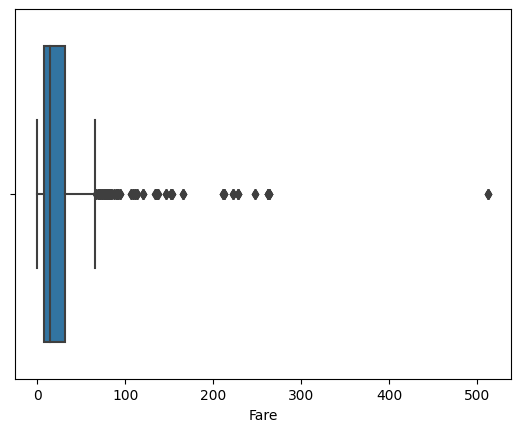

In [46]:
# Lets see the spread of the Fare column
print(df_train.Fare.describe())

# For checking the spread on box plot
sns.boxplot(x=df_train.Fare)
plt.show()

In [47]:
# Make one more column and divide the range of fare on the quantile basis
df_train['Fare_Range'] = pd.qcut(df_train.Fare, q=4, labels=['Below_25%', '25%-50%', '50%-75%', 'Above_75%'])

<Axes: xlabel='Fare_Range', ylabel='Fare'>

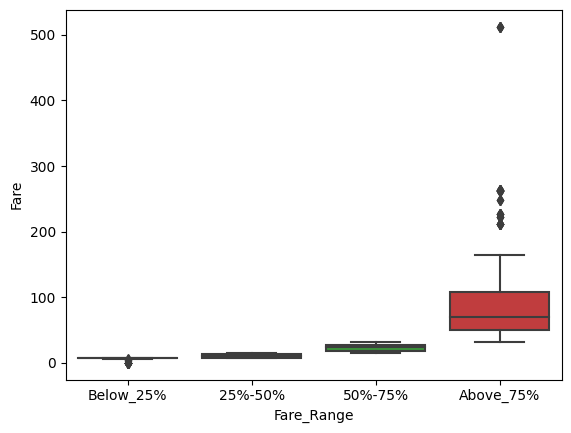

In [48]:
sns.boxplot(data=df_train, x='Fare_Range', y='Fare')

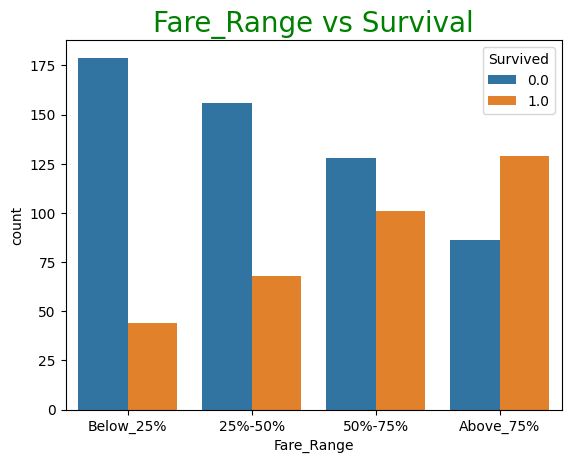

Survived,0.0,1.0,Survival_%
Fare_Range,,,
Below_25%,179,44,19.730942
25%-50%,156,68,30.357143
50%-75%,128,101,44.104803
Above_75%,86,129,60.000000


In [49]:
# Fare_Range vs Survival
sns.countplot(data=df_train, x='Fare_Range', hue='Survived')
plt.title("Fare_Range vs Survival", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.show()

# Fare_Range vs Survival Matrix
fare_survival = df_train.groupby(['Fare_Range', 'Survived']).size().unstack(fill_value=0)
fare_survival['Survival_%'] = fare_survival[1]/fare_survival.sum(axis=1)*100
fare_survival

**Observation**
* <font color=Green>People who paid more for the ticket has more chance of survival.

# Title Column
* We had already analyzed the cabin and embarked column so for now we are going to leave those columns

Title
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64


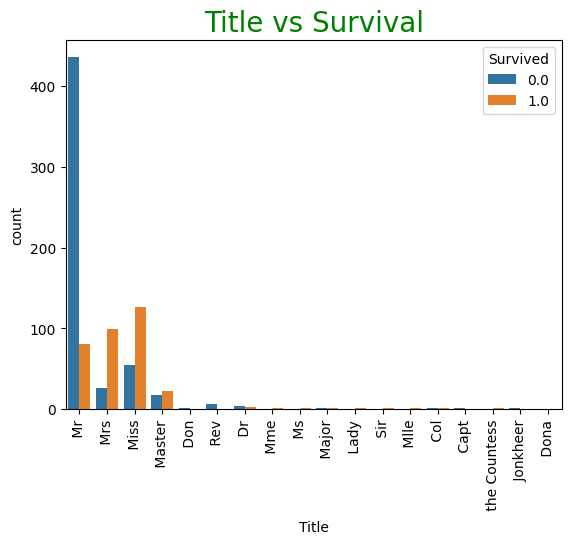

Survived,0.0,1.0,Survival_%
Title,,,
Capt,1,0,0.000000
Col,1,1,50.000000
Don,1,0,0.000000
Dr,4,3,42.857143
Jonkheer,1,0,0.000000
Lady,0,1,100.000000
Major,1,1,50.000000
Master,17,23,57.500000
Miss,55,127,69.780220


In [50]:
print(df_train.Title.value_counts())
# Title vs Survival
sns.countplot(data=df_train, x='Title', hue='Survived')
plt.title("Title vs Survival", fontdict = {'fontsize':20, 'fontweight':5, 'color':'Green'})
plt.xticks(rotation=90)
plt.show()

# Title vs Survival Matrix
title_survival = df_train.groupby(['Title', 'Survived']).size().unstack(fill_value=0)
title_survival['Survival_%'] = title_survival[1]/title_survival.sum(axis=1)*100
title_survival

# Making data ready for model training

In [51]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Fare_Range
0,0.0,3,male,22.0,1,0,5,7.2500,WithoutCabin,S,Mr,20-30,Below_25%
1,1.0,1,female,38.0,1,0,17599,71.2833,WithCabin,C,Mrs,30-40,Above_75%
2,1.0,3,female,26.0,0,0,2,7.9250,WithoutCabin,S,Miss,20-30,25%-50%
3,1.0,1,female,35.0,1,0,113803,53.1000,WithCabin,S,Mrs,30-40,Above_75%
4,0.0,3,male,35.0,0,0,373450,8.0500,WithoutCabin,S,Mr,30-40,25%-50%


In [52]:
df_train.shape

(1309, 13)

In [53]:
df_train.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Title           0
Age_Range       0
Fare_Range      1
dtype: int64

In [54]:
# update fare column
df_train.Fare.fillna(0, inplace=True)

In [55]:
# First fix the columns Sex, Cabin, Embarked, Age_Range, Fare_Range using Label EncodeR
label_encoder = LabelEncoder()
columns = ['Sex', 'Cabin', 'Embarked', 'Title', 'Age_Range', 'Fare_Range']

for column in  columns:
    # Create a new encoded column
    df_train[column+'_encoded'] = label_encoder.fit_transform(df_train[column])
    
    # Remove the existing column
    df_train.drop(column, axis=1, inplace=True)

df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_encoded,Cabin_encoded,Embarked_encoded,Title_encoded,Age_Range_encoded,Fare_Range_encoded
0,0.0,3,22.0,1,0,5,7.2500,1,1,2,12,2,3
1,1.0,1,38.0,1,0,17599,71.2833,0,0,0,13,3,2
2,1.0,3,26.0,0,0,2,7.9250,0,1,2,9,2,0
3,1.0,1,35.0,1,0,113803,53.1000,0,0,2,13,3,2
4,0.0,3,35.0,0,0,373450,8.0500,1,1,2,12,3,0


In [56]:
# drop fare and age column as we already have range for both the columns

df_train.drop(['Age', 'Fare'], axis=1, inplace=True)

In [57]:
# Scale the Age, Ticket, Fare columns
scaler = StandardScaler()
df_train[['Ticket']] = scaler.fit_transform(df_train[['Ticket']])
df_train.head()

,Survived,Pclass,SibSp,Parch,Ticket,Sex_encoded,Cabin_encoded,Embarked_encoded,Title_encoded,Age_Range_encoded,Fare_Range_encoded
0,0.0,3,1,0,-0.445699,1,1,2,12,2,3
1,1.0,1,1,0,-0.410944,0,0,0,13,3,2
2,1.0,3,0,0,-0.445705,0,1,2,9,2,0
3,1.0,1,1,0,-0.220907,0,0,2,13,3,2
4,0.0,3,0,0,0.291990,1,1,2,12,3,0


In [58]:
df_train.corr()

,Survived,Pclass,SibSp,Parch,Ticket,Sex_encoded,Cabin_encoded,Embarked_encoded,Title_encoded,Age_Range_encoded,Fare_Range_encoded
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.128940,-0.543351,-0.316912,-0.167675,-0.190488,-0.095349,-0.038627
Pclass,-0.338481,1.000000,0.060832,0.018322,0.261253,0.124617,0.713857,0.185479,-0.007861,-0.345346,0.039427
SibSp,-0.035322,0.060832,1.000000,0.373587,0.059006,-0.109609,0.009064,0.065567,-0.188333,-0.219728,-0.017806
Parch,0.081629,0.018322,0.373587,1.000000,0.001927,-0.213125,-0.036806,0.044772,-0.101395,-0.149576,-0.017175
Ticket,-0.128940,0.261253,0.059006,0.001927,1.000000,0.043938,0.174341,0.178023,-0.010812,-0.105498,0.067471
Sex_encoded,-0.543351,0.124617,-0.109609,-0.213125,0.043938,1.000000,0.137396,0.097960,0.227419,0.101728,0.039941
Cabin_encoded,-0.316912,0.713857,0.009064,-0.036806,0.174341,0.137396,1.000000,0.205733,0.016284,-0.249589,-0.092516
Embarked_encoded,-0.167675,0.185479,0.065567,0.044772,0.178023,0.097960,0.205733,1.000000,0.057999,-0.064657,-0.192956
Title_encoded,-0.190488,-0.007861,-0.188333,-0.101395,-0.010812,0.227419,0.016284,0.057999,1.000000,0.339536,-0.009235
Age_Range_encoded,-0.095349,-0.345346,-0.219728,-0.149576,-0.105498,0.101728,-0.249589,-0.064657,0.339536,1.000000,0.063640


In [63]:
# Now split the train data
X_train = df_train.iloc[:891, 1:]
y_train = df_train.iloc[:891, 0].astype('int')
X_test = df_train.iloc[891:, 1:]
read_data = pd.read_csv('gender_submission.csv')
y_test = read_data.iloc[:,1]
survived=read_data.iloc[:,0]

In [64]:
X_train

,Pclass,SibSp,Parch,Ticket,Sex_encoded,Cabin_encoded,Embarked_encoded,Title_encoded,Age_Range_encoded,Fare_Range_encoded
0,3,1,0,-0.445699,1,1,2,12,2,3
1,1,1,0,-0.410944,0,0,0,13,3,2
2,3,0,0,-0.445705,0,1,2,9,2,0
3,1,1,0,-0.220907,0,0,2,13,3,2
4,3,0,0,0.291990,1,1,2,12,3,0
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,-0.027849,1,1,2,15,2,0
887,1,0,0,-0.224364,0,0,2,9,1,1
888,3,1,2,-0.432658,0,1,2,9,2,1
889,1,0,0,-0.225715,1,0,0,12,2,1


In [65]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [66]:
X_test

,Pclass,SibSp,Parch,Ticket,Sex_encoded,Cabin_encoded,Embarked_encoded,Title_encoded,Age_Range_encoded,Fare_Range_encoded
0,3,0,0,0.207960,1,1,1,12,3,3
1,3,1,0,0.271885,0,1,2,13,4,3
2,2,0,0,0.028923,1,1,1,12,6,0
3,3,0,0,0.176834,1,1,2,12,2,0
4,3,1,1,5.680476,0,1,2,13,2,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,-0.445699,1,1,2,12,3,0
414,1,0,0,-0.410630,0,0,0,3,3,2
415,3,0,0,5.680405,1,1,2,12,3,3
416,3,0,0,0.264056,1,1,2,12,3,0


In [67]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [68]:
survived

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [69]:
X_test.isnull().sum()

Pclass                0
SibSp                 0
Parch                 0
Ticket                0
Sex_encoded           0
Cabin_encoded         0
Embarked_encoded      0
Title_encoded         0
Age_Range_encoded     0
Fare_Range_encoded    0
dtype: int64

In [70]:
# Train the logistic_Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(accuracy)

0.9234449760765551


In [72]:
# Train the decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(accuracy)

0.7966507177033493


In [73]:
# Using SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svc = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

1.0


In [75]:
# Using XB Boust Classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y_test)), random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xg = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xg)
print(accuracy)

0.8277511961722488


**Final Observation**
* Logistic Regression accuracy on the test data: 92.34%
* Decision Tree Classifier accuracy on the test data: 79.42%%
* Support Vector Classifier accuracy on the test data: 100% --> In SVC there is a possibility of Overfitting.
* XG Boust accuracy on the test data: 81.34%

# Submission File
* For the Submission I am using Logistic Regression Model

In [84]:
df_lr = pd.DataFrame({"PassengerId":survived, "Survived":y_pred_lr})
df_lr.to_csv("Submission_lr.csv", index=False)

In [80]:
df_dt = pd.DataFrame({"PassengerId":survived, "Survived":y_pred_dt})
df_dt.to_csv("Submission_dt.csv", index=False)

In [81]:
df_svc = pd.DataFrame({"PassengerId":survived, "Survived":y_pred_svc})
df_svc.to_csv("Submission_svc.csv", index=False)

In [83]:
df_xgb = pd.DataFrame({"PassengerId":survived, "Survived":y_pred_xg})
df_xgb.to_csv("Submission_xgb.csv", index=False)